<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout4_PartB_Mean_and_Variance_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #4 : Mean and Variance Functions


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 4.1

For this example, we will consider data from the US Census Bureau.  The goal of this investigation is to understand the relationship betwewen Poverty and Median Household Income. In particular, the analysis should identify counties which have a higher than expected poverty levels.
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: % Poverty</li><br>
        <li><strong>Predictor</strong> Variables (i.e. independent variables)</li>
        <ul>
          <li>Median Household Income</li>
          <li>Percent Uninsured</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=14hl4EkQMBUmuxHBSLiCXgfkYszZD7onC"></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [2]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [3]:
# Reading data in using read_csv
USCountyIncome <- read_csv("http://www.StatsClass.org/stat360/Datasets/USCountyLevel_IncomePovertyUninsured.csv")

Rows: 3142 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): County_Name, State_Name, Region, Division, CurrentGovernorParty, St...
dbl (4): Population, MedianIncome_Household, PCT_Poverty, PCT_Uninsured

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The **head()** function can be used to see the first few lines of the dataset.

In [4]:
# taking a look at the data
head(USCountyIncome)

County_Name,State_Name,Region,Division,CurrentGovernorParty,State,STATE_FIPS,COUNTY_FIPS,FIPS,Population,MedianIncome_Household,PCT_Poverty,PCT_Uninsured
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",Alabama,South,East South Central,Republican,AL,01,001,01001,55639,57982,15.2,10.6
"Baldwin County, AL",Alabama,South,East South Central,Republican,AL,01,003,01003,218289,61756,9.2,10.9
"Barbour County, AL",Alabama,South,East South Central,Republican,AL,01,005,01005,25026,34990,28.6,14.4
"Bibb County, AL",Alabama,South,East South Central,Republican,AL,01,007,01007,22374,51721,18.1,13.0
"Blount County, AL",Alabama,South,East South Central,Republican,AL,01,009,01009,57755,48922,13.7,13.3
"Bullock County, AL",Alabama,South,East South Central,Republican,AL,01,011,01011,10173,33866,29.5,12.4


## Understanding the Distribution of Poverty | Income 

In [5]:
# Summaries of the data.frame

(USCountyIncome
  %>% select(MedianIncome_Household, PCT_Poverty, PCT_Uninsured)
  %>% summary()
)

 MedianIncome_Household  PCT_Poverty   PCT_Uninsured  
 Min.   : 22292         Min.   : 0.0   Min.   : 2.30  
 1st Qu.: 45658         1st Qu.:10.3   1st Qu.: 8.00  
 Median : 52856         Median :13.6   Median :10.70  
 Mean   : 55015         Mean   :14.6   Mean   :11.85  
 3rd Qu.: 61502         3rd Qu.:17.8   3rd Qu.:14.80  
 Max.   :147111         Max.   :58.9   Max.   :41.40  
                                       NA's   :1      

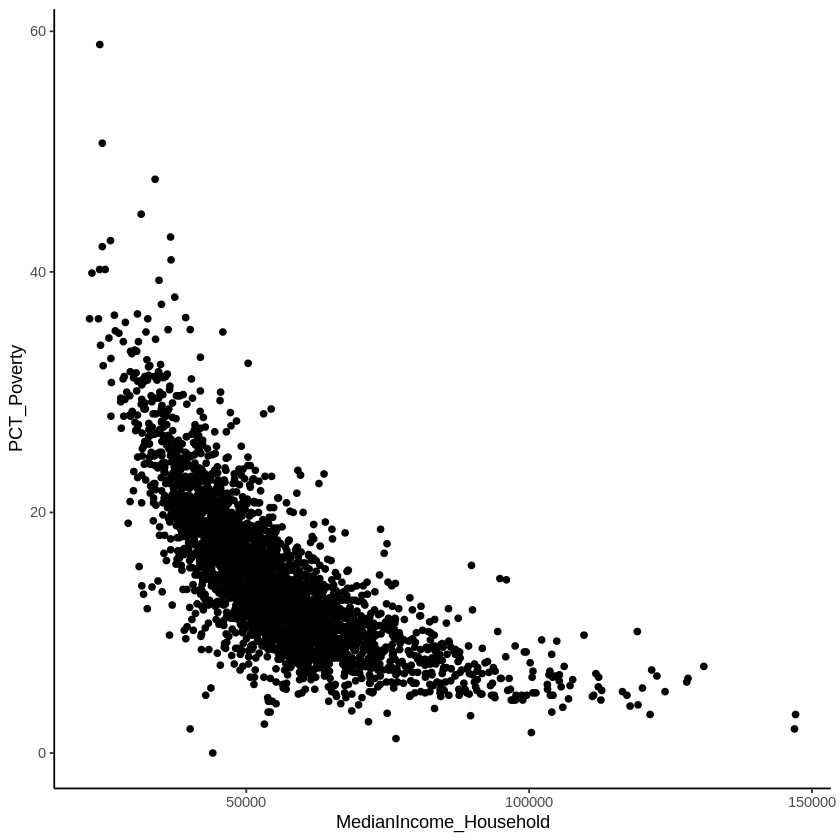

In [6]:
# First scatterplot
ggplot(data=USCountyIncome, aes(x=MedianIncome_Household, y=PCT_Poverty) ) + 
  geom_point() + 
  theme_classic()

## LOESS Fit to a Scatterplot

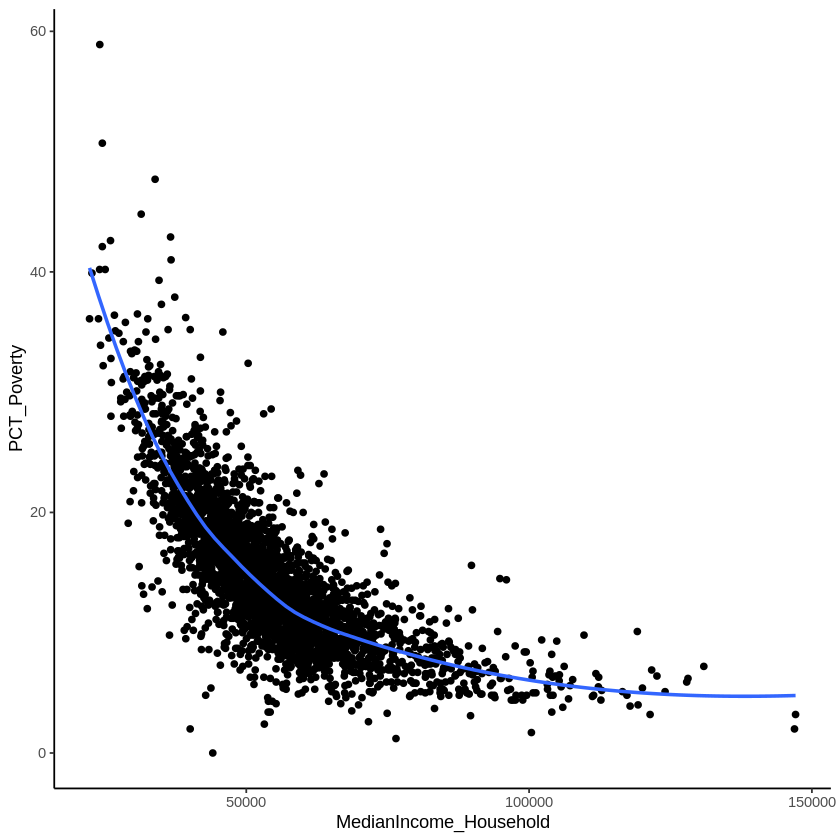

In [7]:
#@title Adding a Loess Fit to scatterplot
ggplot(data=USCountyIncome, aes(x=MedianIncome_Household, y=PCT_Poverty) ) + 
  geom_point() + 
  #geom_smooth(method = 'lm', formula = y ~ x, se = FALSE) + 
  #geom_smooth(method = 'lm', formula = y ~ poly(x,2), se = FALSE) + 
  #geom_smooth(method='loess', formula = y ~ x, se = FALSE) + 
  geom_smooth(method='loess', formula = y ~ x, se = FALSE, span=0.50) + 
  theme_classic()

<table>
  <tr>
    <td align="center" valign="top" width="50%"><font size="+1">Larger Span = Larger Window</font>
    </td>
    <td align="center" valign="top" width="50%"><font size="+1">Smaller Span = Smaller Window</font>
    </td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1FmzVggbLrP6xSueJZUra8M9LGbxJwFtO"></img>
    </td>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1INCFFhkN6l_oxLym-2l-bX5q4hoTLKk0"></img>
    </td>
  </tr>
</table>


<table>
  <tr>
    <td align="center" valign="top" width="50%"><font size="+1">Form = Linear</font>
    </td>
    <td align="center" valign="top" width="50%"><font size="+1">Form = Quadratic</font>
    </td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1O6SES9bTx0OiY0lIRR2OLHZYKG4xuXx4"></img>
    </td>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1hN0PrmyylTjKjtR6KYEoGMt2MWTID5Wt"></img>
    </td>
  </tr>
</table>

<table>
  <tr>
    <td align="center" valign="top" width="50%"><font size="+1">Weights = Normal</font>
    </td>
    <td align="center" valign="top" width="50%"><font size="+1">Weights = Uniform</font>
    </td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1T5lOSnc4yhi4yxPkdQRYoekEdhZJc6MB"></img>
    </td>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1z2BwUp_8gUikxztZt6iZaf4iRIO0kWsQ"></img>
    </td>
  </tr>
</table>


The following code can be used to obtain a loess fit for the conditional **mean** functions apart from the geom_smooth() function in ggplot.

In [8]:
#Fit the loess smoother
LoessModel_Poverty_Income <- loess(PCT_Poverty ~ MedianIncome_Household, data = USCountyIncome, span=0.50)
LoessModel_Poverty_Income

Call:
loess(formula = PCT_Poverty ~ MedianIncome_Household, data = USCountyIncome, 
    span = 0.5)

Number of Observations: 3142 
Equivalent Number of Parameters: 8.1 
Residual Standard Error: 3.507 

In [9]:
#Add predicted values for mean function to dataframe
(USCountyIncome
   %>% mutate(
                Predicted_Poverty = predict(LoessModel_Poverty_Income, newdata=USCountyIncome) 
             )
   %>% select(County_Name, State, FIPS, MedianIncome_Household, PCT_Poverty, Predicted_Poverty )
) -> USCountyIncome_with_Predicted

#View the first few rows of updated data.frame
head(USCountyIncome_with_Predicted)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.88019
"Baldwin County, AL",AL,01003,61756,9.2,10.92864
"Barbour County, AL",AL,01005,34990,28.6,24.80074
"Bibb County, AL",AL,01007,51721,18.1,14.34085
"Blount County, AL",AL,01009,48922,13.7,15.62687
"Bullock County, AL",AL,01011,33866,29.5,25.86508


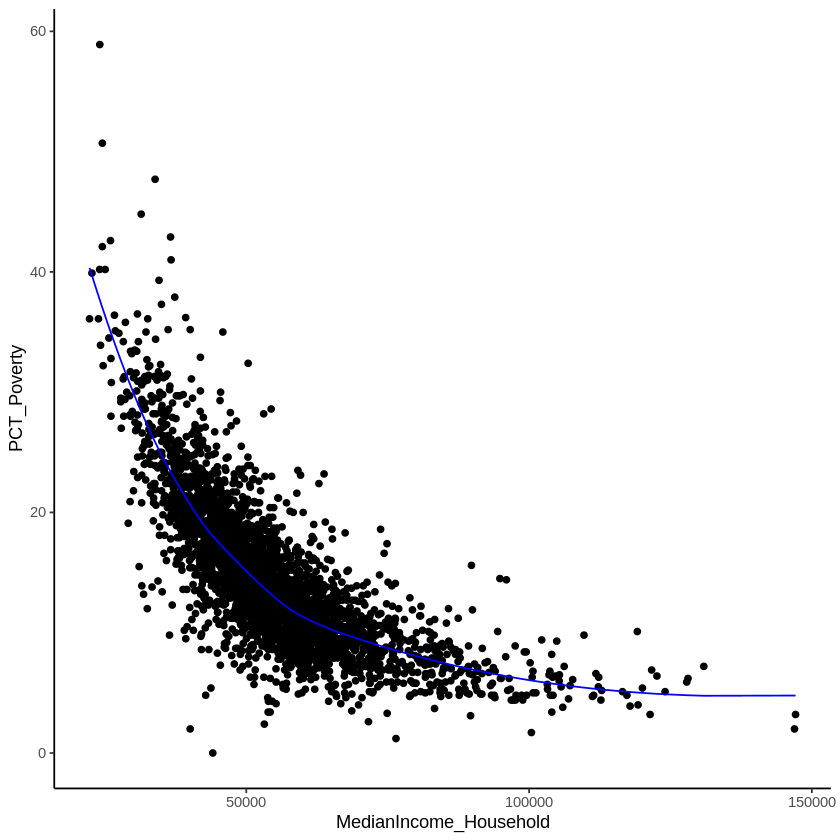

In [10]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  theme_classic()

In [11]:
#Appending residuals and their squared values to USCountyIncome the data.frame
(USCountyIncome_with_Predicted
                    %>% mutate(Residual = PCT_Poverty - Predicted_Poverty)
                    %>% mutate(ResidualSquared = Residual^2)
) -> USCountyIncome_with_Predicted_Residuals

head(USCountyIncome_with_Predicted_Residuals)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,ResidualSquared
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.88019,3.319811,11.021142
"Baldwin County, AL",AL,01003,61756,9.2,10.92864,-1.728636,2.988184
"Barbour County, AL",AL,01005,34990,28.6,24.80074,3.799262,14.434394
"Bibb County, AL",AL,01007,51721,18.1,14.34085,3.759149,14.131201
"Blount County, AL",AL,01009,48922,13.7,15.62687,-1.926866,3.712813
"Bullock County, AL",AL,01011,33866,29.5,25.86508,3.634919,13.212635


In [12]:
(USCountyIncome_with_Predicted_Residuals
  %>% summarize(
                  SSE = sum(ResidualSquared)
               )
)

SSE
<dbl>
38534.4


$$ \begin{array}{rcl}
\mbox{Residual Standard Error}  & = & \sqrt{\frac{\mbox{Sum of Squared Error}}{(n-\mbox{# model parameters})}} \\
& = & \sqrt{\frac{38534.4}{3142 - 8.1}} \\
& = & \sqrt{12.29} \\
& = & 3.507
\end{array}
$$

$$ \mbox{Lower Bound} = \mbox{Predicted_Poverty} - (2 * 3.507)
$$

$$ \mbox{Upper Bound} = \mbox{Predicted_Poverty} + (2 * 3.507)
$$


In [13]:
(USCountyIncome_with_Predicted_Residuals
  %>% mutate(
              LowerBound = Predicted_Poverty - (2 * 3.507),
              UpperBound = Predicted_Poverty + (2 * 3.507)
            )
) -> USCountyIncome_with_Predicted_Residuals_Bounds 

head(USCountyIncome_with_Predicted_Residuals_Bounds)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,ResidualSquared,LowerBound,UpperBound
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.88019,3.319811,11.021142,4.866189,18.89419
"Baldwin County, AL",AL,01003,61756,9.2,10.92864,-1.728636,2.988184,3.914636,17.94264
"Barbour County, AL",AL,01005,34990,28.6,24.80074,3.799262,14.434394,17.786738,31.81474
"Bibb County, AL",AL,01007,51721,18.1,14.34085,3.759149,14.131201,7.326851,21.35485
"Blount County, AL",AL,01009,48922,13.7,15.62687,-1.926866,3.712813,8.612866,22.64087
"Bullock County, AL",AL,01011,33866,29.5,25.86508,3.634919,13.212635,18.851081,32.87908


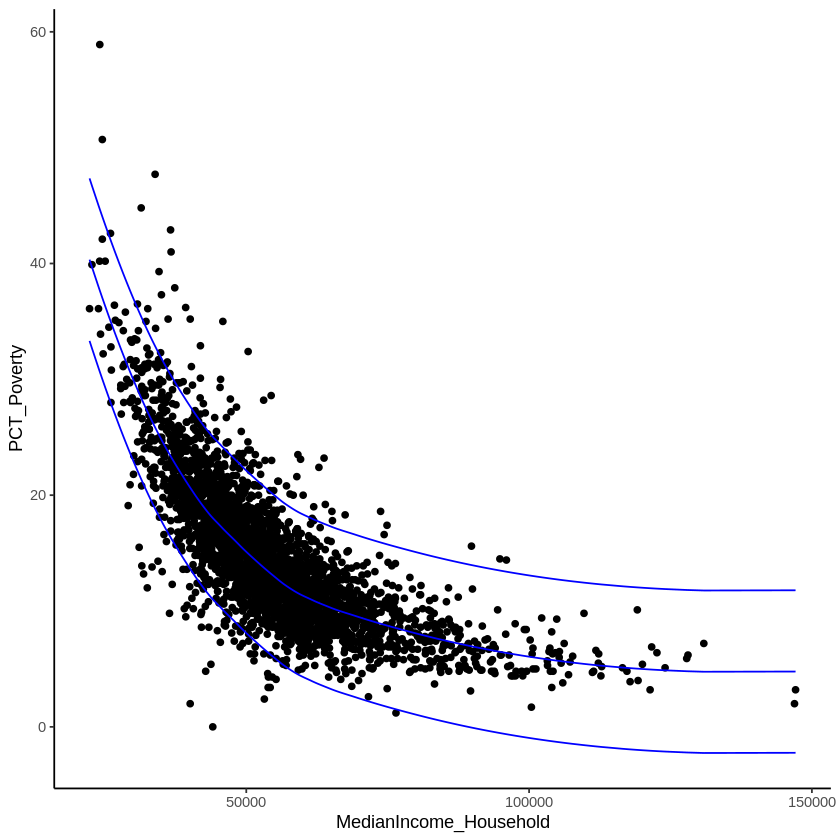

In [14]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_Residuals_Bounds, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()

### Variance Function via Squared Residuals

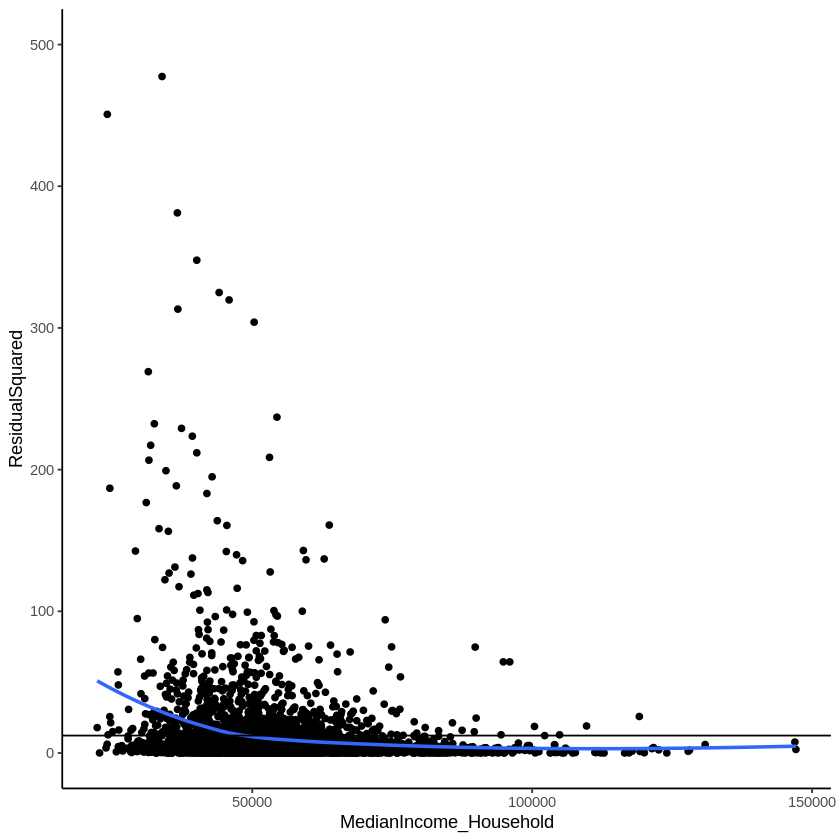

In [18]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_Residuals, aes(x=MedianIncome_Household,y=ResidualSquared)) + 
  geom_point() + 
  geom_smooth(method="loess", formula = y~x, se = FALSE) + 
  geom_abline(intercept=12.29,slope=0) + 
  ylim(0,500) + 
  theme_classic()

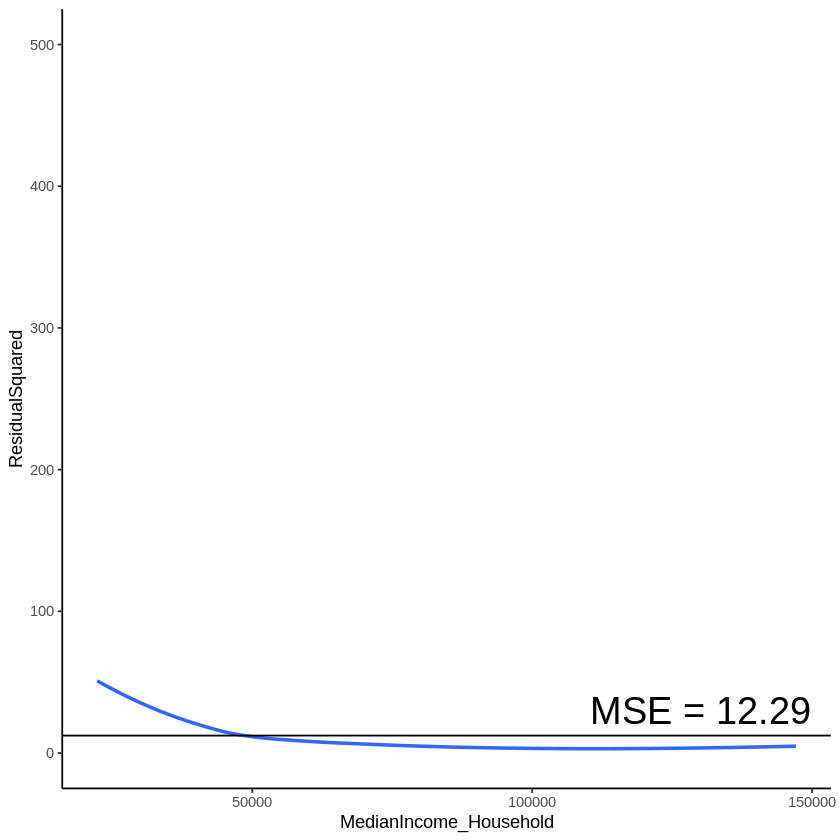

In [22]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_Residuals, aes(x=MedianIncome_Household,y=ResidualSquared)) + 
  #geom_point() + 
  geom_smooth(method="loess", formula = y~x, se = FALSE) + 
  geom_abline(intercept=12.29,slope=0) + 
  ylim(0,500) + 
  annotate(
           "text", label = "MSE = 12.29",
            x = 130000, y = 30, size = 8, colour = "black"
  ) + 
  theme_classic()


In [28]:
#Fit the loess smoother
LoessModel_ResidualSquared_Income <- loess(ResidualSquared ~ MedianIncome_Household, data = USCountyIncome_with_Predicted_Residuals)

In [29]:
#Add predicted values for mean function to dataframe
(USCountyIncome_with_Predicted_Residuals
   %>% mutate(
                Predicted_ResidualSquared = predict(LoessModel_ResidualSquared_Income, newdata=USCountyIncome_with_Predicted_Residuals) 
             )
) -> USCountyIncome_with_Predicted_AbsResiduals_Predicted_ResidualSquared

#View the first few rows of updated data.frame
head(USCountyIncome_with_Predicted_AbsResiduals_Predicted_ResidualSquared)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,ResidualSquared,Predicted_ResidualSquared
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.88019,3.319811,11.021142,8.744431
"Baldwin County, AL",AL,01003,61756,9.2,10.92864,-1.728636,2.988184,7.785447
"Barbour County, AL",AL,01005,34990,28.6,24.80074,3.799262,14.434394,27.269029
"Bibb County, AL",AL,01007,51721,18.1,14.34085,3.759149,14.131201,10.708917
"Blount County, AL",AL,01009,48922,13.7,15.62687,-1.926866,3.712813,12.127492
"Bullock County, AL",AL,01011,33866,29.5,25.86508,3.634919,13.212635,28.984078


$$ \mbox{Lower Bound} = \mbox{Predicted_Poverty} - (2 * \sqrt{\mbox{Predicted_ResidualSquared }})
$$

$$ \mbox{Upper Bound} = \mbox{Predicted_Poverty} + (2 * \sqrt{\mbox{Predicted_ResidualSquared }})
$$

### Variance Function via |Residual|

In [25]:
#Appending residuals and their squared values to USCountyIncome the data.frame
(USCountyIncome_with_Predicted
                    %>% mutate(Residual = PCT_Poverty - Predicted_Poverty)
                    %>% mutate(AbsResidual = abs(Residual))
) -> USCountyIncome_with_Predicted_AbsResiduals

head(USCountyIncome_with_Predicted_AbsResiduals)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,AbsResidual
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.88019,3.319811,3.319811
"Baldwin County, AL",AL,01003,61756,9.2,10.92864,-1.728636,1.728636
"Barbour County, AL",AL,01005,34990,28.6,24.80074,3.799262,3.799262
"Bibb County, AL",AL,01007,51721,18.1,14.34085,3.759149,3.759149
"Blount County, AL",AL,01009,48922,13.7,15.62687,-1.926866,1.926866
"Bullock County, AL",AL,01011,33866,29.5,25.86508,3.634919,3.634919


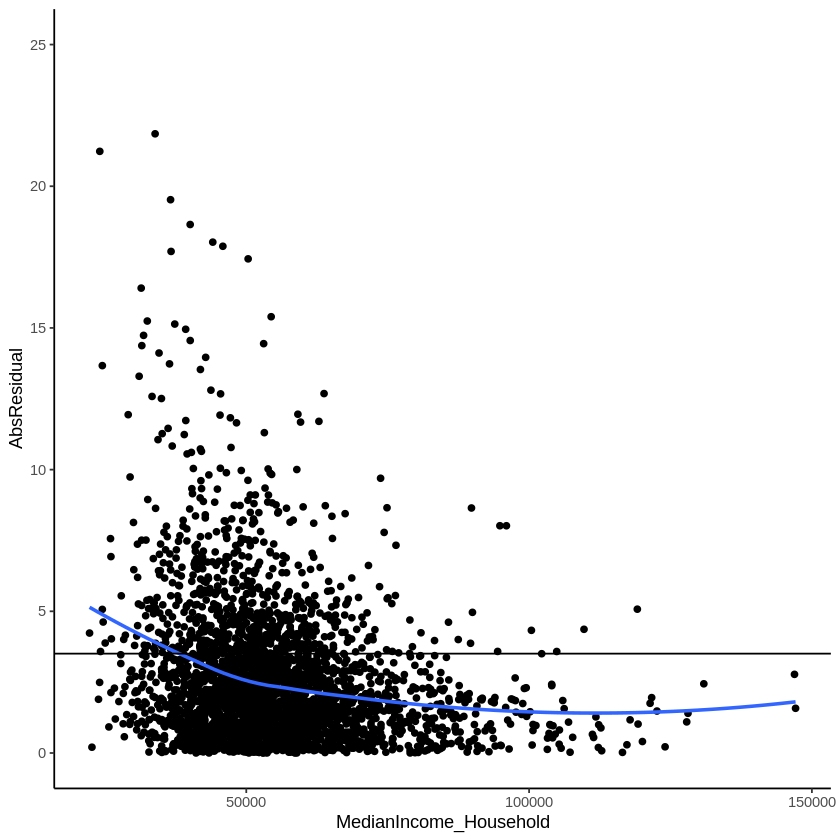

In [ ]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_AbsResiduals, aes(x=MedianIncome_Household,y=AbsResidual)) + 
  geom_point() + 
  geom_smooth(method="loess", formula = y~x, se = FALSE) + 
  geom_abline(intercept=3.507,slope=0) + 
  ylim(0,25) + 
  theme_classic()

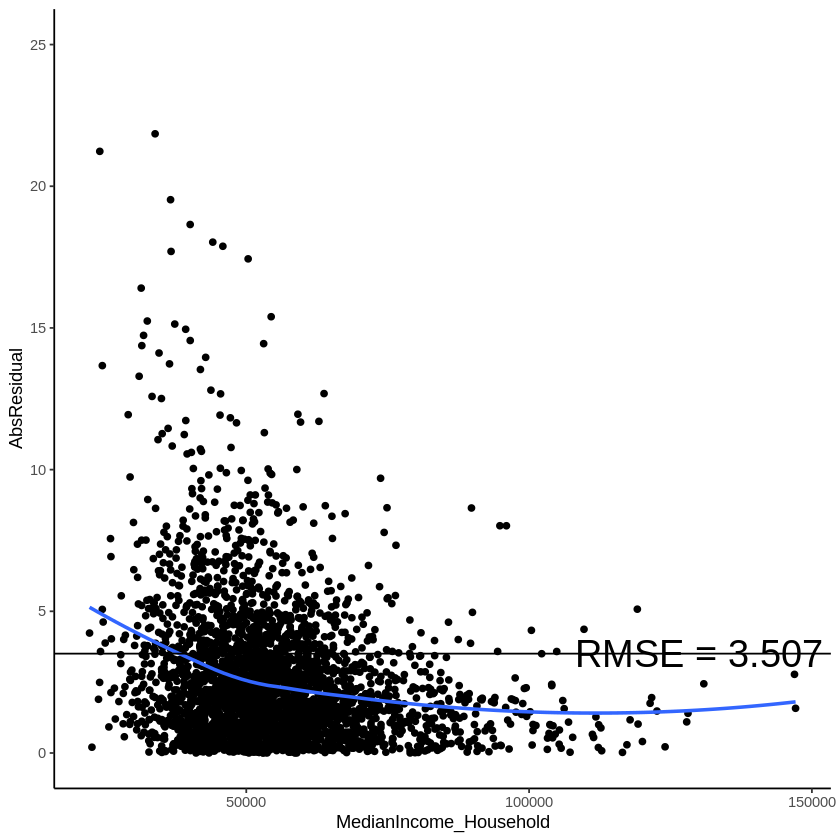

In [ ]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_AbsResiduals, aes(x=MedianIncome_Household,y=AbsResidual)) + 
  geom_point() + 
  geom_smooth(method="loess", formula = y~x, se = FALSE) + 
  geom_abline(intercept=3.507,slope=0) + 
  ylim(0,25) + 
  annotate(
           "text", label = "RMSE = 3.507",
            x = 130000, y = 3.507, size = 8, colour = "black"
  ) + 
  theme_classic()

In [26]:
#Fit the loess smoother
LoessModel_AbsResidual_Income <- loess(AbsResidual ~ MedianIncome_Household, data = USCountyIncome_with_Predicted_AbsResiduals)

In [27]:
#Add predicted values for mean function to dataframe
(USCountyIncome_with_Predicted_AbsResiduals
   %>% mutate(
                Predicted_AbsResidual = predict(LoessModel_AbsResidual_Income, newdata=USCountyIncome_with_Predicted_AbsResiduals) 
             )
   #%>% select(County_Name, State, MedianIncome_Household, PCT_Poverty, Predicted_Poverty )
) -> USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual

#View the first few rows of updated data.frame
head(USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,AbsResidual,Predicted_AbsResidual
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.88019,3.319811,3.319811,2.263333
"Baldwin County, AL",AL,01003,61756,9.2,10.92864,-1.728636,1.728636,2.147100
"Barbour County, AL",AL,01005,34990,28.6,24.80074,3.799262,3.799262,3.805115
"Bibb County, AL",AL,01007,51721,18.1,14.34085,3.759149,3.759149,2.470776
"Blount County, AL",AL,01009,48922,13.7,15.62687,-1.926866,1.926866,2.620522
"Bullock County, AL",AL,01011,33866,29.5,25.86508,3.634919,3.634919,3.914128


$$ \mbox{Lower Bound} = \mbox{Predicted_Poverty} - (2 * \mbox{Predicted_AbsResidual})
$$

$$ \mbox{Upper Bound} = \mbox{Predicted_Poverty} + (2 * \mbox{Predicted_AbsResidual})
$$

In [ ]:
(USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual
 %>% mutate(
              LowerBound = Predicted_Poverty - (2 * Predicted_AbsResidual),
              UpperBound = Predicted_Poverty + (2 * Predicted_AbsResidual)
           )
) -> USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds

head(USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,AbsResidual,Predicted_AbsResidual,LowerBound,UpperBound
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.88019,3.319811,3.319811,2.270260,7.339669,16.42071
"Baldwin County, AL",AL,01003,61756,9.2,10.92864,-1.728636,1.728636,2.168176,6.592284,15.26499
"Barbour County, AL",AL,01005,34990,28.6,24.80074,3.799262,3.799262,3.843224,17.114289,32.48719
"Bibb County, AL",AL,01007,51721,18.1,14.34085,3.759149,3.759149,2.474911,9.391028,19.29067
"Blount County, AL",AL,01009,48922,13.7,15.62687,-1.926866,1.926866,2.589702,10.447462,20.80627
"Bullock County, AL",AL,01011,33866,29.5,25.86508,3.634919,3.634919,3.942466,17.980150,33.75001


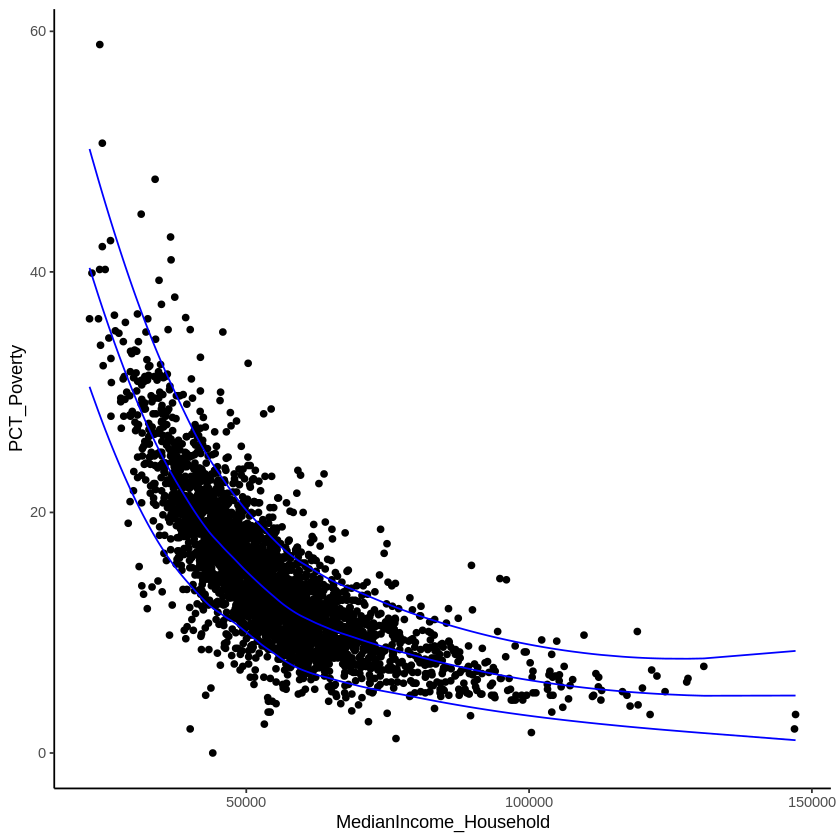

In [ ]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()

In [ ]:
install.packages("patchwork")
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



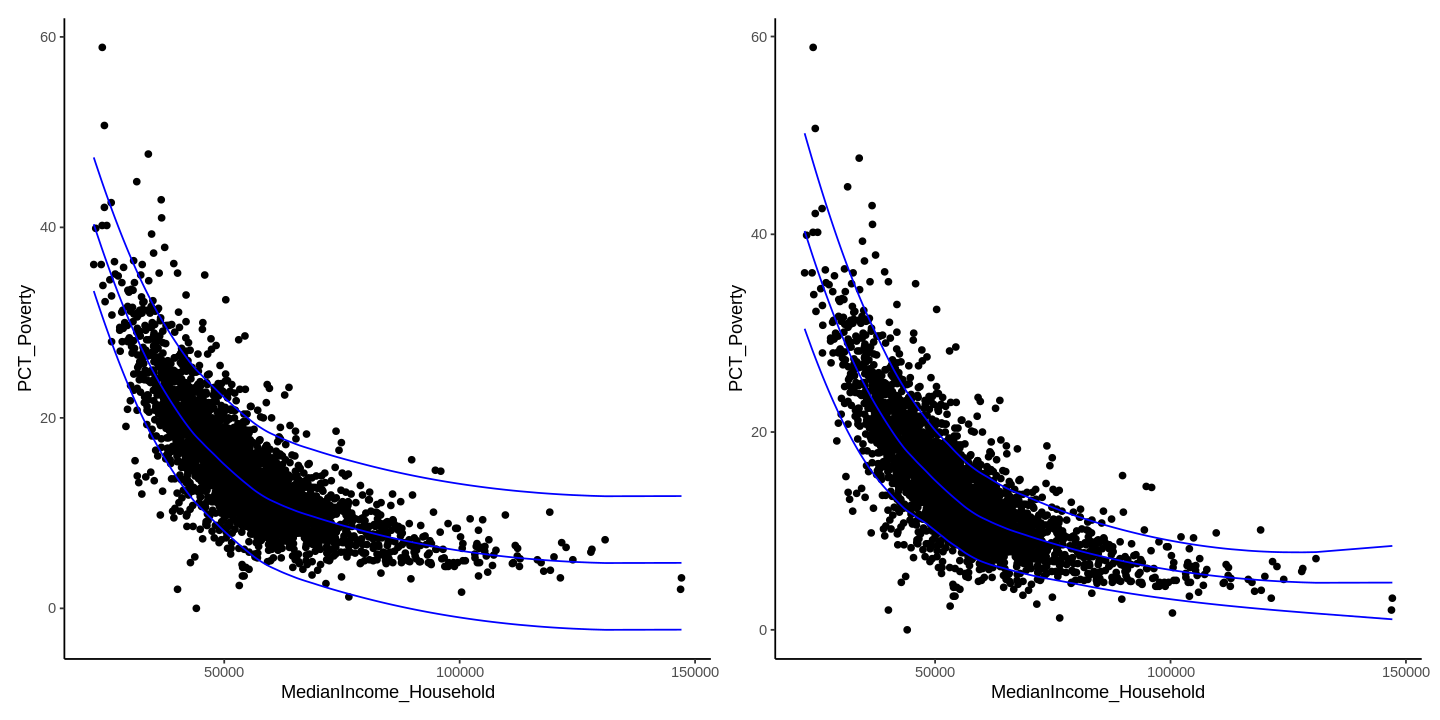

In [ ]:
# Specify and improved plotting region for COLAB
options(repr.plot.width = 12, repr.plot.height = 6)

#Create plot with Conditional Mean Function via Loess
plot1 <- ggplot(data=USCountyIncome_with_Predicted_Residuals_Bounds, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()


plot2 <- ggplot(data=USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()

  plot1 + plot2

# Return plotting region back to default settings
options(repr.plot.width = 7, repr.plot.height = 7)

### Detection of Outliers

In [ ]:
(USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds
  %>% mutate(
              Outlier_HighSide = ifelse(PCT_Poverty > UpperBound, "Yes", "No"),
              Outlier_LowSide = ifelse(PCT_Poverty < LowerBound, "Yes", "No"),
            )
) -> USCountyIncome_Outliers

head(USCountyIncome_Outliers)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,AbsResidual,Predicted_AbsResidual,LowerBound,UpperBound,Outlier_HighSide,Outlier_LowSide
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
"Autauga County, AL",AL,01001,57982,15.2,11.88019,3.319811,3.319811,2.270260,7.339669,16.42071,No,No
"Baldwin County, AL",AL,01003,61756,9.2,10.92864,-1.728636,1.728636,2.168176,6.592284,15.26499,No,No
"Barbour County, AL",AL,01005,34990,28.6,24.80074,3.799262,3.799262,3.843224,17.114289,32.48719,No,No
"Bibb County, AL",AL,01007,51721,18.1,14.34085,3.759149,3.759149,2.474911,9.391028,19.29067,No,No
"Blount County, AL",AL,01009,48922,13.7,15.62687,-1.926866,1.926866,2.589702,10.447462,20.80627,No,No
"Bullock County, AL",AL,01011,33866,29.5,25.86508,3.634919,3.634919,3.942466,17.980150,33.75001,No,No


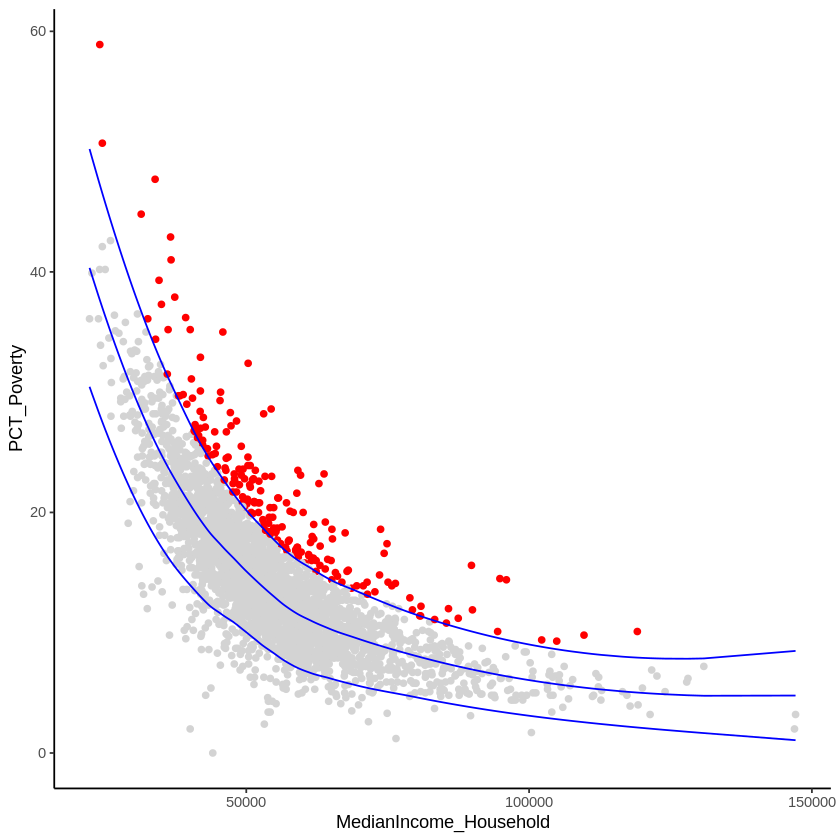

In [ ]:
ggplot(data=USCountyIncome_Outliers, aes(x=MedianIncome_Household,y=PCT_Poverty, col=Outlier_HighSide)) + 
  geom_point() + 
  scale_color_manual(values=c("lightgray", "red"))+
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()+
    theme(legend.position = "none")
  

In [ ]:
(USCountyIncome_Outliers
 %>% count(State, Outlier_HighSide)
 %>% group_by(State)
 %>% spread(Outlier_HighSide,n)
 %>% mutate(Percent = Yes/(No+Yes))
 %>% arrange(desc(Percent))
 %>% mutate(Percent = ifelse(is.na(Percent), 0, Percent))
 %>% rename(state = State)
) -> USCountyIncome_Outliers_by_State

USCountyIncome_Outliers_by_State

state,No,Yes,Percent
<chr>,<int>,<int>,<dbl>
CA,40,18,0.310344828
AZ,11,4,0.266666667
AK,23,7,0.233333333
NM,26,7,0.212121212
SD,52,14,0.212121212
NJ,17,4,0.190476190
NV,14,3,0.176470588
LA,54,10,0.156250000
NY,54,8,0.129032258


In [ ]:
install.packages("usmap")
library(usmap)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



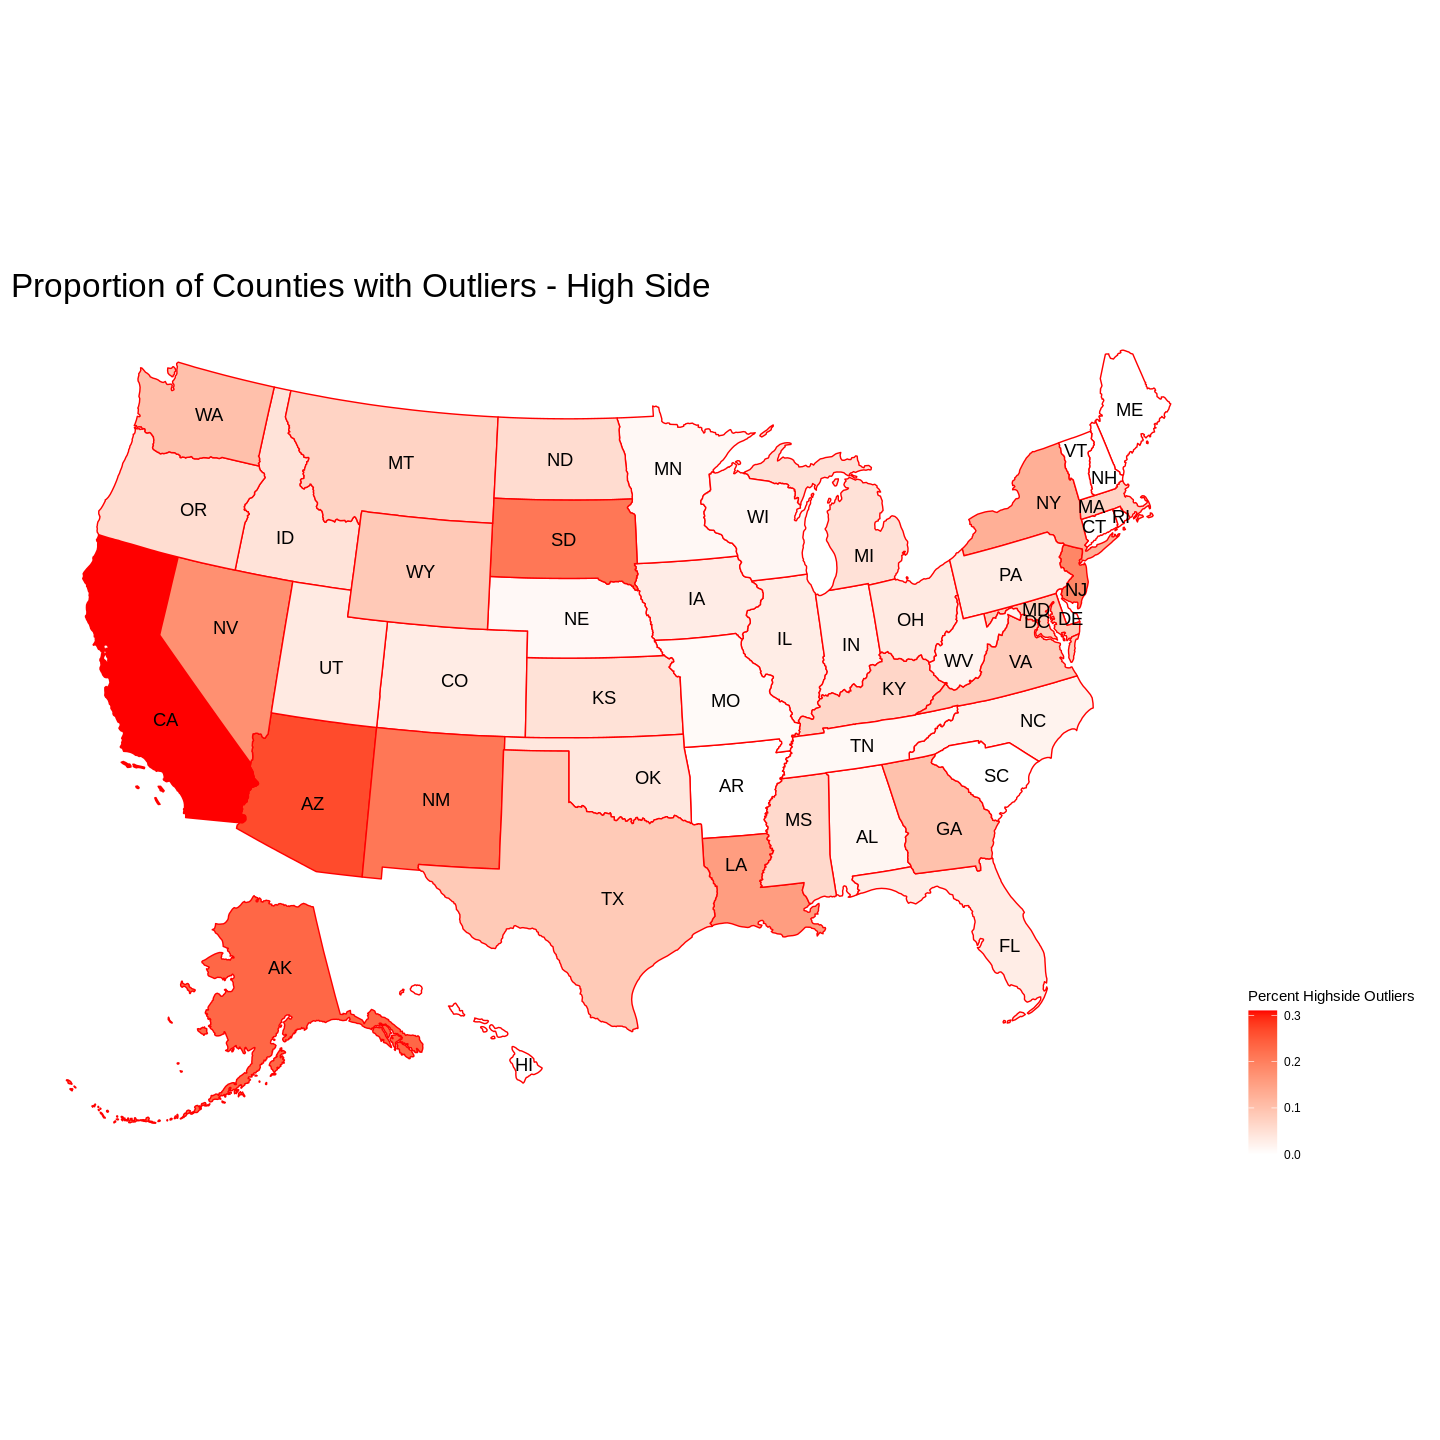

In [ ]:
# Specify and improved plotting region for COLAB
options(repr.plot.width = 12, repr.plot.height = 12)

plot_usmap(
            data = USCountyIncome_Outliers_by_State,
            region = "state",
            values = "Percent", 
            color = "red",
            labels=TRUE
          ) + 
              scale_fill_continuous(
                                      low = "white", high = "red", name = "Percent Highside Outliers"
                                   ) + 
              labs(title = "Proportion of Counties with Outliers - High Side") +
              theme(legend.position = "right", plot.title = element_text(size=20))

# Return to default setting
options(repr.plot.width = 7, repr.plot.height = 7)


fips,Outlier_1_0
<chr>,<dbl>
01001,0
01003,0
01005,0
01007,0
01009,0
01011,0


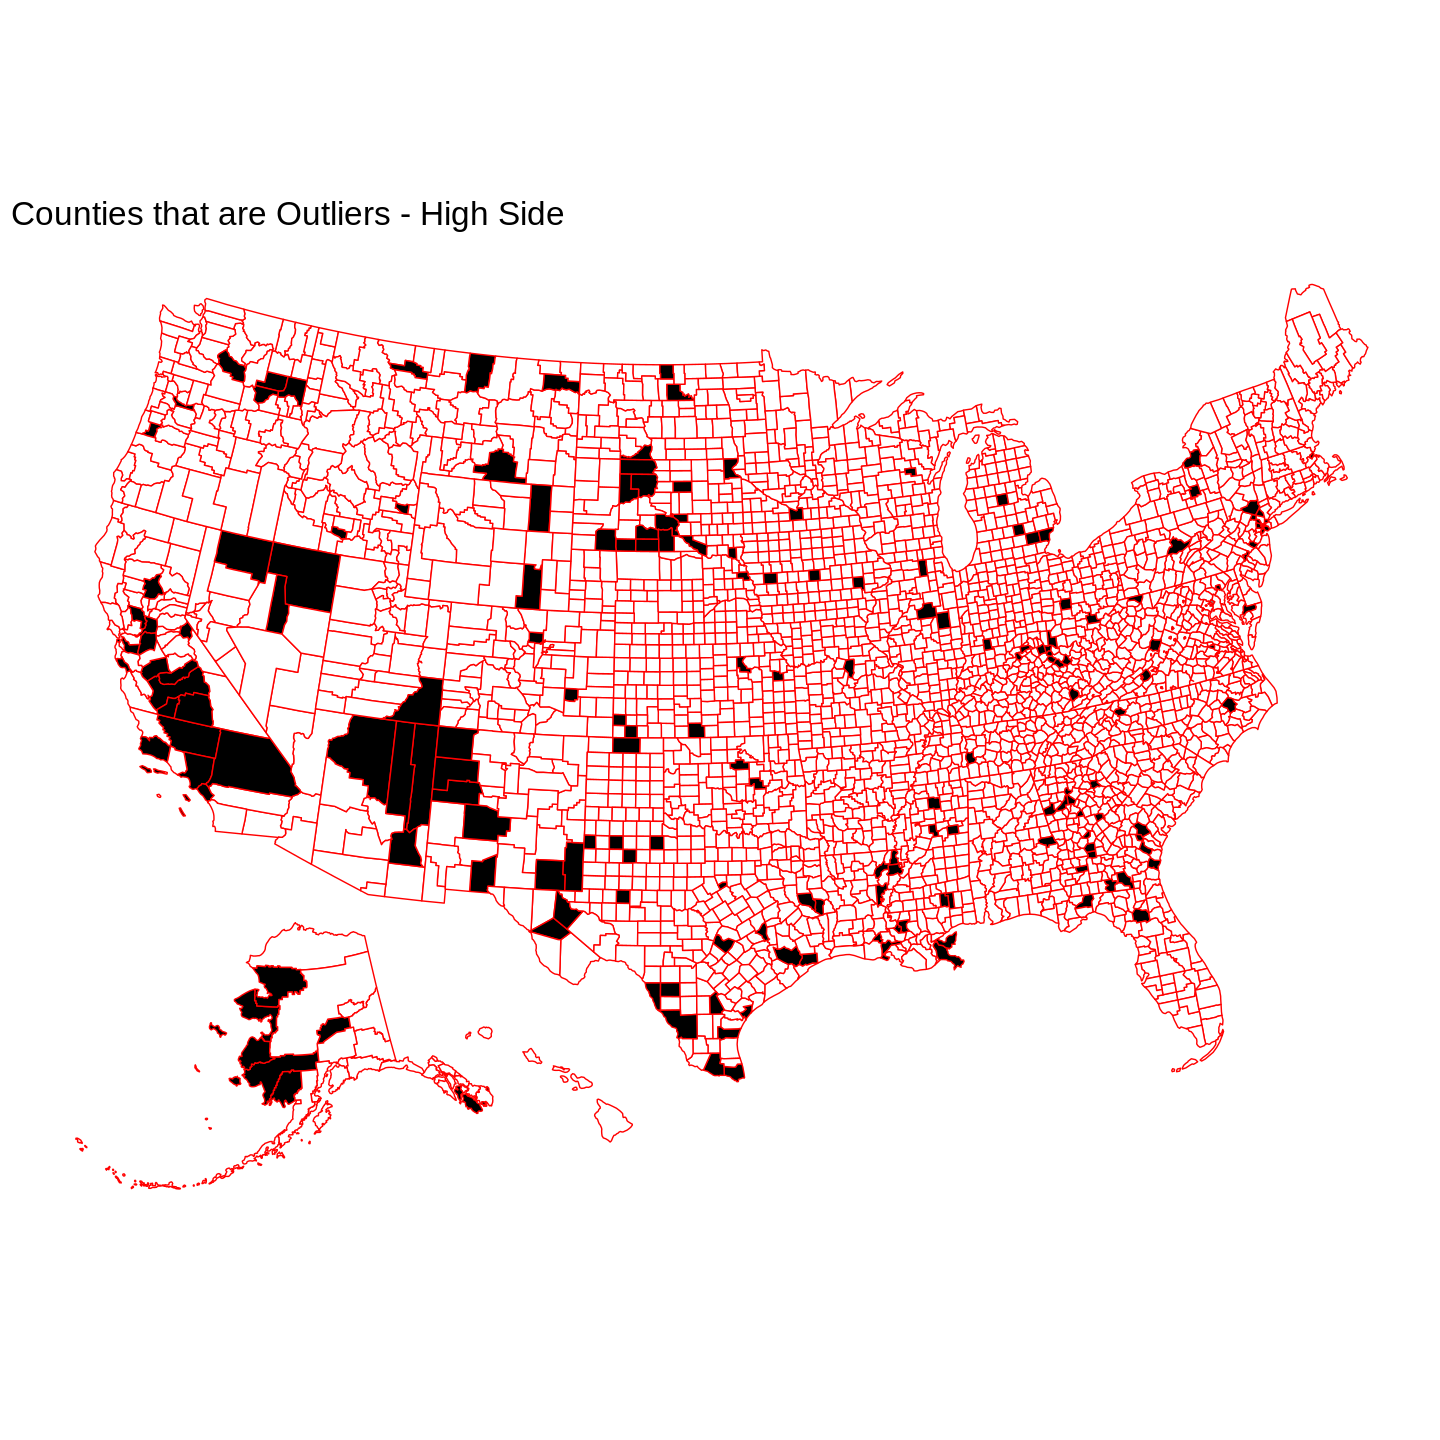

In [ ]:
# Specify and improved plotting region for COLAB
options(repr.plot.width = 12, repr.plot.height = 12)

(USCountyIncome_Outliers
  %>% select(State, County_Name, FIPS, Outlier_HighSide)
  %>% mutate(
              Outlier_1_0 = ifelse(Outlier_HighSide == "Yes",1,0)
             )
  %>% rename(fips=FIPS)
  %>% select(fips,Outlier_1_0)
) -> USCountyIncome_Outliers_1_0

head(USCountyIncome_Outliers_1_0)

plot_usmap(
            data = USCountyIncome_Outliers_1_0,
            region = "counties",
            values = "Outlier_1_0", 
            color = "red",
            labels=FALSE
          ) +
               scale_fill_continuous(
                                      low = "white", high ="black"
                                   ) + 
              labs(title = "Counties that are Outliers - High Side") +
              theme(legend.position = "none", plot.title = element_text(size=20))

# Return to default setting
options(repr.plot.width = 7, repr.plot.height = 7)

In [ ]:
(USCountyIncome_Outliers
 %>% select(State, County_Name, MedianIncome_Household, PCT_Poverty, Predicted_Poverty, Outlier_HighSide)
 %>% filter(State == "CA", Outlier_HighSide == "Yes")
)

State,County_Name,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Outlier_HighSide
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
CA,"Alameda County, CA",104888,9.3,5.718090,Yes
CA,"Alpine County, CA",85750,12.0,7.384726,Yes
CA,"Butte County, CA",54972,18.2,12.975460,Yes
CA,"Fresno County, CA",57109,20.8,12.163200,Yes
CA,"Kern County, CA",54851,20.4,13.024251,Yes
CA,"Kings County, CA",61556,16.0,10.974427,Yes
CA,"Madera County, CA",61924,19.0,10.891027,Yes
CA,"Merced County, CA",56330,18.8,12.436298,Yes
CA,"Orange County, CA",94441,10.1,6.515686,Yes


In [33]:
(USCountyIncome_with_Predicted
  %>% summarize(
                  Mean = mean(PCT_Poverty),
                  Variance = var(PCT_Poverty),
                  Count = n(),
                  SSE_Marginal = (Count-1)*Variance
  )
)

(USCountyIncome_with_Predicted
  %>% mutate(
              Residual = (PCT_Poverty - Predicted_Poverty),
              Residual_Squared = (Residual)^2
            )
) -> USCountyIncome_with_MeanPrediction_and_Residuals

(USCountyIncome_with_MeanPrediction_and_Residuals
  %>% summarize(
                SSE_Conditional = sum(Residual_Squared)
  )
)

Mean,Variance,Count,SSE_Marginal
<dbl>,<dbl>,<int>,<dbl>
14.60172,38.4488,3142,120767.7


SSE_Conditional
<dbl>
38534.4


$$\begin{array}{rcl}
R^{2} & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}}\\
& = & \frac{120767.7-38534.4}{120767.7} \\
& = & \frac{82233.3}{120767.7} \\
& = & 0.6809 \\
& \approx & 68\%
\end{array}
$$

In [34]:
(USCountyIncome_with_Predicted
  %>% select(PCT_Poverty, Predicted_Poverty)
  %>% cor()
)

,PCT_Poverty,Predicted_Poverty
PCT_Poverty,1.0000000,0.8251929
Predicted_Poverty,0.8251929,1.0000000


$$\begin{array}{rcl}
R^{2} & = & (0.8252)^{2} \\
& = & 0.6809 \\
& \approx & 68\%
\end{array}
$$

---



---
End of Document
